In [155]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math

# Многоклассовая классификация

1. загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)

In [156]:
from sklearn.datasets import load_digits
digits = load_digits()

2. Осмотрите данные и метки.

In [157]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [158]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [159]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [160]:
df = pd.DataFrame(digits['data'], columns=digits['feature_names'])
df['target'] = digits['target']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [161]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [162]:
pd.DataFrame(digits['target'])

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


3. попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.

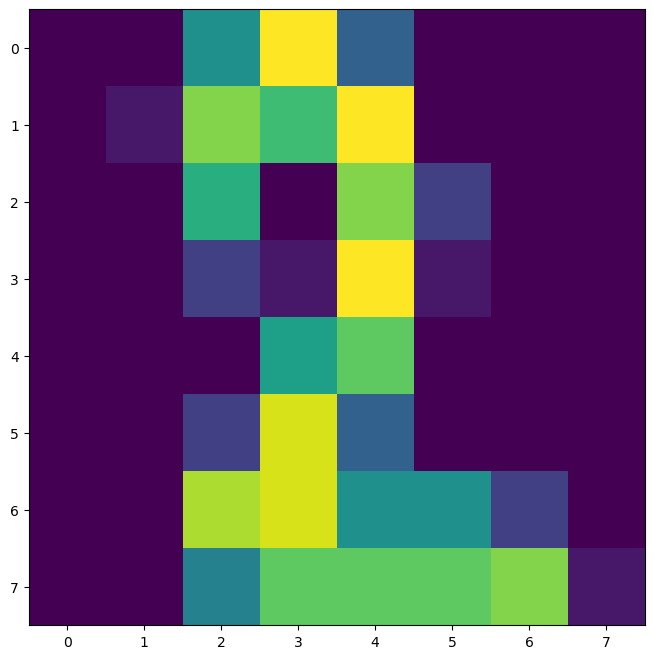

In [163]:
fig, ax = plt.subplots()
ax.imshow(digits.images[22])
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

In [164]:
# Похоже что изображения это цифры от 0 до 9 написанные от руки

4. Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации. 

In [165]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [166]:
X = digits.data
Y = digits.target

In [167]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [168]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier (random_state = 42)

In [169]:
SGDclf.fit(X,Y)

SGDClassifier(random_state=42)

In [170]:
SGDclf.score(X,Y)

0.9699499165275459

In [171]:
pred_OvR = SGDclf.predict(X)

In [172]:
cm_OvR = confusion_matrix(Y, pred_OvR)
cm_OvR

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 164,   1,   1,   0,   0,   0,   0,  14,   2],
       [  0,   0, 176,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 166,   0,   5,   0,   1,   8,   3],
       [  0,   1,   0,   0, 174,   1,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   1,   3],
       [  0,   1,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 177]], dtype=int64)

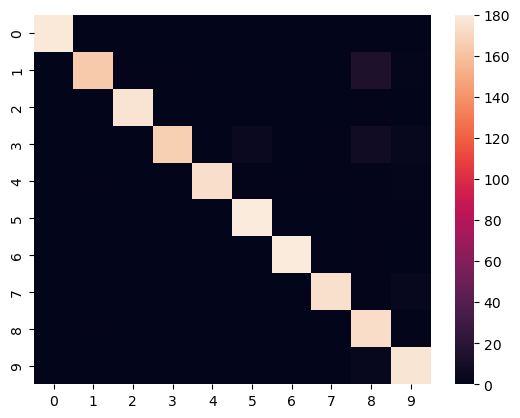

In [173]:
import numpy as np

#np.fill_diagonal(cm, 0)
sns.heatmap(cm_OvR);

5. Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.

<AxesSubplot:>

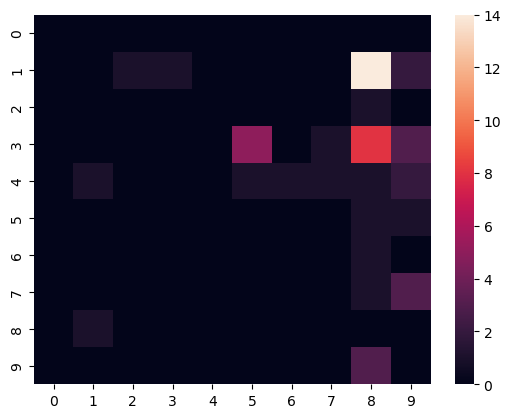

In [174]:
cm_OvR_copy = cm_OvR.copy()
np.fill_diagonal(cm_OvR_copy, 0)
sns.heatmap(cm_OvR_copy)

In [175]:
'''Вывод: Судя по матрице неточностей с обнуленной диагональю, 
многоклассовый классификатор SGDClassifier чаще всего путает цифры 1 и 8, 8 и 3, а также 3 и 5'''

'Вывод: Судя по матрице неточностей с обнуленной диагональю, \nмногоклассовый классификатор SGDClassifier чаще всего путает цифры 1 и 8, 8 и 3, а также 3 и 5'

In [176]:
# макро - считает метрики для каждой метки и берет среднее значение. 
precision_score(Y,pred_OvR, average = 'macro'), recall_score(Y,pred_OvR, average = 'macro'), f1_score(Y,pred_OvR, average = 'macro') 

(0.9720937814810465, 0.9702604940886219, 0.9701342616961084)

### OvR

In [177]:
SGDclf.decision_function([X[65]])

array([[-1487.49470607, -2587.46049624, -2980.84846946, -2545.81232129,
        -1788.15576422, -1579.82921463,  1396.42680308, -2417.5565278 ,
         -282.76523228, -2538.88922362]])

In [178]:
SGDclf.predict([X[65]])

array([6])

### OvO

In [179]:
from sklearn.multiclass import OneVsOneClassifier 

In [180]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(X,Y)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [181]:
ovoSGD.decision_function([X[65]])

array([[5.33317651, 5.3332988 , 4.66730856, 1.6666775 , 6.33326825,
        2.66670422, 9.33332876, 0.66667661, 8.33332392, 0.66667314]])

In [182]:
ovoSGD.predict([X[65]])

array([6])

In [183]:
ovoSGD.estimators_

(SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassi

In [184]:
pred_OvO = ovoSGD.predict(X)

In [185]:
precision_score(Y,pred_OvO, average = 'macro'), recall_score(Y,pred_OvO, average = 'macro'), f1_score(Y,pred_OvO, average = 'macro') 

(1.0, 1.0, 1.0)

In [151]:
cm_OvO = confusion_matrix(Y, pred_OvO)
cm_OvO

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]], dtype=int64)

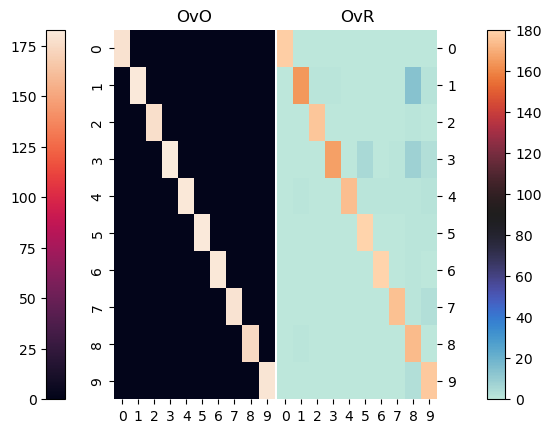

In [197]:
# Выведем матрицы неточностей двух стратегий
fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(cm_OvO, cmap="rocket", ax=ax, cbar=False)
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
sns.heatmap(cm_OvR, cmap="icefire", ax=ax2, cbar=False)
fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
ax.set_title('OvO')
ax2.set_title('OvR')
plt.show()

In [198]:
'''По результатам сравнения стратегий OvO и OvR видно что стратегия OvO дала 100%-й результат, 
что выглядит хорошо, т.к. мы обучали на всем имеющемся объеме данных.
Считаю что более релевантно будет оценить качество обоих стратегий на тестовых выборках'''

'По результатам сравнения стратегий OvO и OvR видно что стратегия OvO дала 100%-й результат, \nчто выглядит хорошо, т.к. мы обучали на всем имеющемся объеме данных.\nСчитаю что более релевантно будет оценить качество обоих стратегий на тестовых выборках'

## Логистическая регрессия

1. Возьмите датасет с данными по телефонной компании с прошлых уроков.

In [135]:
x = np.linspace(-7,7, 100)
y = np.linspace(-2,2, 100)
v = np.linspace(-2,2, 100)
for i in range(100):
    y[i] = 1/(1+math.exp(-x[i]))
    v[i] = 0.5


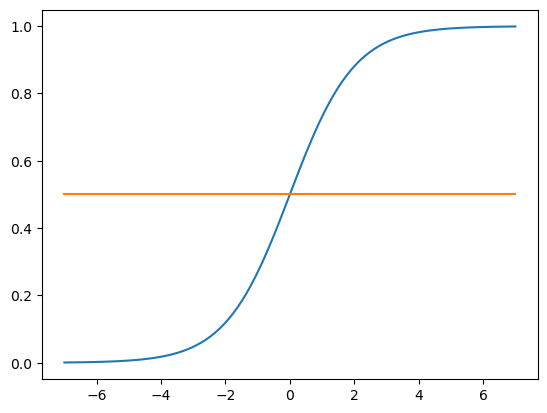

In [136]:
plt.plot(x,y)
plt.plot(x,v)

In [137]:
x = np.linspace(0.001, 1, 100)
y = np.linspace(0.001, 1, 100)

for i in range(100):
    y[i] = - math.log(x[i])


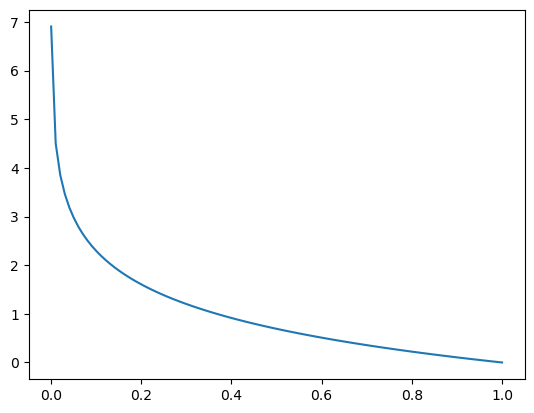

In [138]:
plt.plot(x,y)

In [139]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int32)

In [141]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [142]:
from sklearn.linear_model import LogisticRegression 
logReg = LogisticRegression()

In [143]:
logReg.fit(X,y)

LogisticRegression()

In [145]:
logReg.predict([X[78]])

array([0], dtype=int32)

In [150]:
logReg.predict_proba([X[78]])

array([[0.66709636, 0.33290364]])

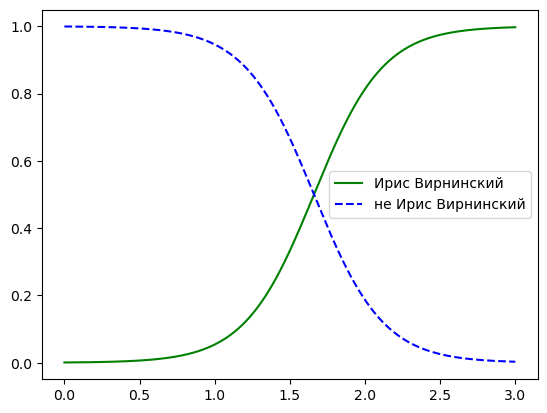

In [151]:
Xnew = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = logReg.predict_proba(Xnew)
plt.plot(Xnew, y_proba[:,1], 'g-', label = 'Ирис Вирнинский')
plt.plot(Xnew, y_proba[:,0], 'b--', label = 'не Ирис Вирнинский');
plt.legend()

In [ ]:
# граница уверенных решений менее 1 и более 2,
# внутри интервала классификатор менее уверен

In [153]:
logReg.predict_proba([[1.5],[1.7]])

array([[0.66709636, 0.33290364],
       [0.45722097, 0.54277903]])

In [202]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
mm = MinMaxScaler()

In [172]:
X = iris['data']

In [159]:
mm.fit(X)

MinMaxScaler()

In [169]:
X = mm.fit_transform(X)

In [163]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [170]:
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [176]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 3)

In [177]:
X_ = pf.fit_transform(X)

In [178]:
X_.shape

(150, 35)

In [179]:
X_

array([[1.0000e+00, 5.1000e+00, 3.5000e+00, ..., 3.9200e-01, 5.6000e-02,
        8.0000e-03],
       [1.0000e+00, 4.9000e+00, 3.0000e+00, ..., 3.9200e-01, 5.6000e-02,
        8.0000e-03],
       [1.0000e+00, 4.7000e+00, 3.2000e+00, ..., 3.3800e-01, 5.2000e-02,
        8.0000e-03],
       ...,
       [1.0000e+00, 6.5000e+00, 3.0000e+00, ..., 5.4080e+01, 2.0800e+01,
        8.0000e+00],
       [1.0000e+00, 6.2000e+00, 3.4000e+00, ..., 6.7068e+01, 2.8566e+01,
        1.2167e+01],
       [1.0000e+00, 5.9000e+00, 3.0000e+00, ..., 4.6818e+01, 1.6524e+01,
        5.8320e+00]])